<a href="https://colab.research.google.com/github/malinphy/q_17/blob/main/umap_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install umap-learn -q
# !pip install hdbscan -q
!pip install umap-learn[plot] -q
import numpy as np
import umap
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.manifold import TSNE

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 KB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
vector_dir = 'drive/MyDrive/BBC_content_vectors.npy'
embedding_vectors = np.load(vector_dir)
print((embedding_vectors).shape)

(15468, 1536)


In [4]:
# umap_embeddings = (umap.UMAP().fit_transform(embedding_vectors))

# pca = decomposition.PCA(n_components=2)
# pca.fit(embedding_vectors)
# pca_embs = pca.transform(embedding_vectors)

# tsne_ = TSNE(n_components=2)
# tsne_.fit(embedding_vectors)
# tsne_embs = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(embedding_vectors)

In [5]:
# plt.figure(figsize = (15,6))
# plt.subplot(1,3,1)
# plt.scatter(umap_embeddings[:,0],umap_embeddings[:,1])
# plt.title('UMAP')

# plt.subplot(1,3,2)
# plt.title('PCA')
# plt.scatter(pca_embs[:,0],pca_embs[:,1])

# plt.subplot(1,3,3)
# plt.scatter(tsne_embs[:,0],tsne_embs[:,1])
# plt.title('t-SNE')

  0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.8/dist-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.8/dist-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


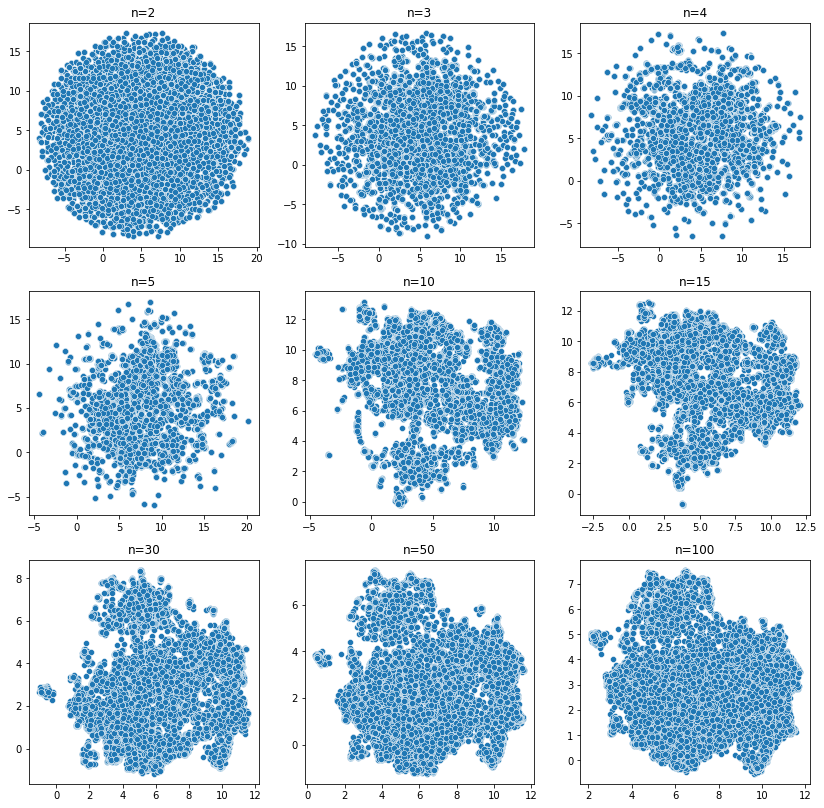

In [6]:
from tqdm.auto import tqdm
import seaborn as sns

fig, ax = plt.subplots(3, 3, figsize=(14, 14))
nns = [2, 3, 4, 5, 10, 15, 30, 50, 100]
i, j = 0, 0
for n_neighbors in tqdm(nns):
    fit = umap.UMAP(n_neighbors=n_neighbors)
    u = fit.fit_transform(embedding_vectors);
    sns.scatterplot(x=u[:,0], y=u[:,1], ax=ax[j, i])
    ax[j, i].set_title(f'n={n_neighbors}')
    if i < 2: i += 1
    else: i = 0; j += 1

  0%|          | 0/9 [00:00<?, ?it/s]

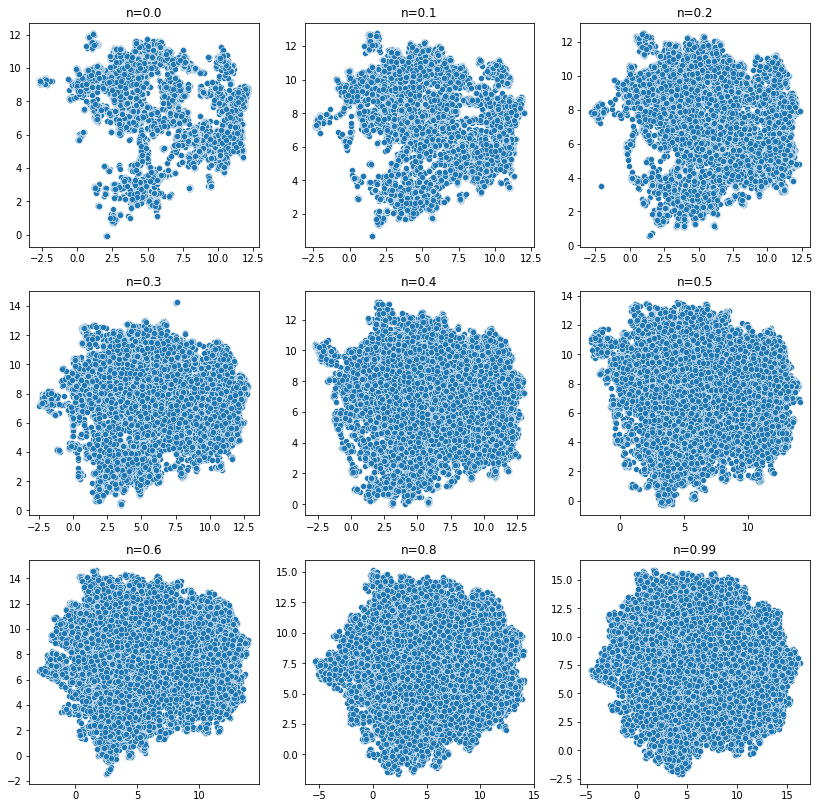

In [7]:
fit = umap.UMAP()
umap_embeddings = fit.fit_transform(embedding_vectors);
fig, ax = plt.subplots(3,3 , figsize=(14, 14))
ss = [0.0, 0.1, 0.2,0.3, 0.4,0.5,0.6, 0.8, 0.99] ## sample size
i, j = 0, 0
for min_dist in tqdm(ss):
    # fit = umap.UMAP(min_dist=min_dist)
    u = fit.fit_transform(embedding_vectors);
    sns.scatterplot(x=u[:,0], y=u[:,1], ax=ax[j, i])
    ax[j, i].set_title(f'n={min_dist}')
    if i < 2: i += 1
    else: i = 0; j += 1

In [8]:
!pip install hdbscan -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 38.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [9]:
import hdbscan ### clustering algorithm
from hdbscan import flat

In [10]:
fit = umap.UMAP()
umap_embeddings = fit.fit_transform(embedding_vectors);

In [12]:
clusters = hdbscan.HDBSCAN(metric='euclidean').fit(umap_embeddings)

In [15]:
print('NUMBER OF CLUSTERS:', len(set(clusters.labels_)))

NUMBER OF CLUSTERS: 541


In [23]:
len(np.where((clusters.labels_)==-1)[0])

4450

  0%|          | 0/9 [00:00<?, ?it/s]

10 NUMBER OF CLUSTERS: 222
10 NUMBER OF outliers: 4450
20 NUMBER OF CLUSTERS: 116
20 NUMBER OF outliers: 4813
40 NUMBER OF CLUSTERS: 62
40 NUMBER OF outliers: 4845
70 NUMBER OF CLUSTERS: 37
70 NUMBER OF outliers: 5834
100 NUMBER OF CLUSTERS: 21
100 NUMBER OF outliers: 5650
200 NUMBER OF CLUSTERS: 3
200 NUMBER OF outliers: 1155
300 NUMBER OF CLUSTERS: 6
300 NUMBER OF outliers: 5710
400 NUMBER OF CLUSTERS: 5
400 NUMBER OF outliers: 4662
500 NUMBER OF CLUSTERS: 4
500 NUMBER OF outliers: 5780


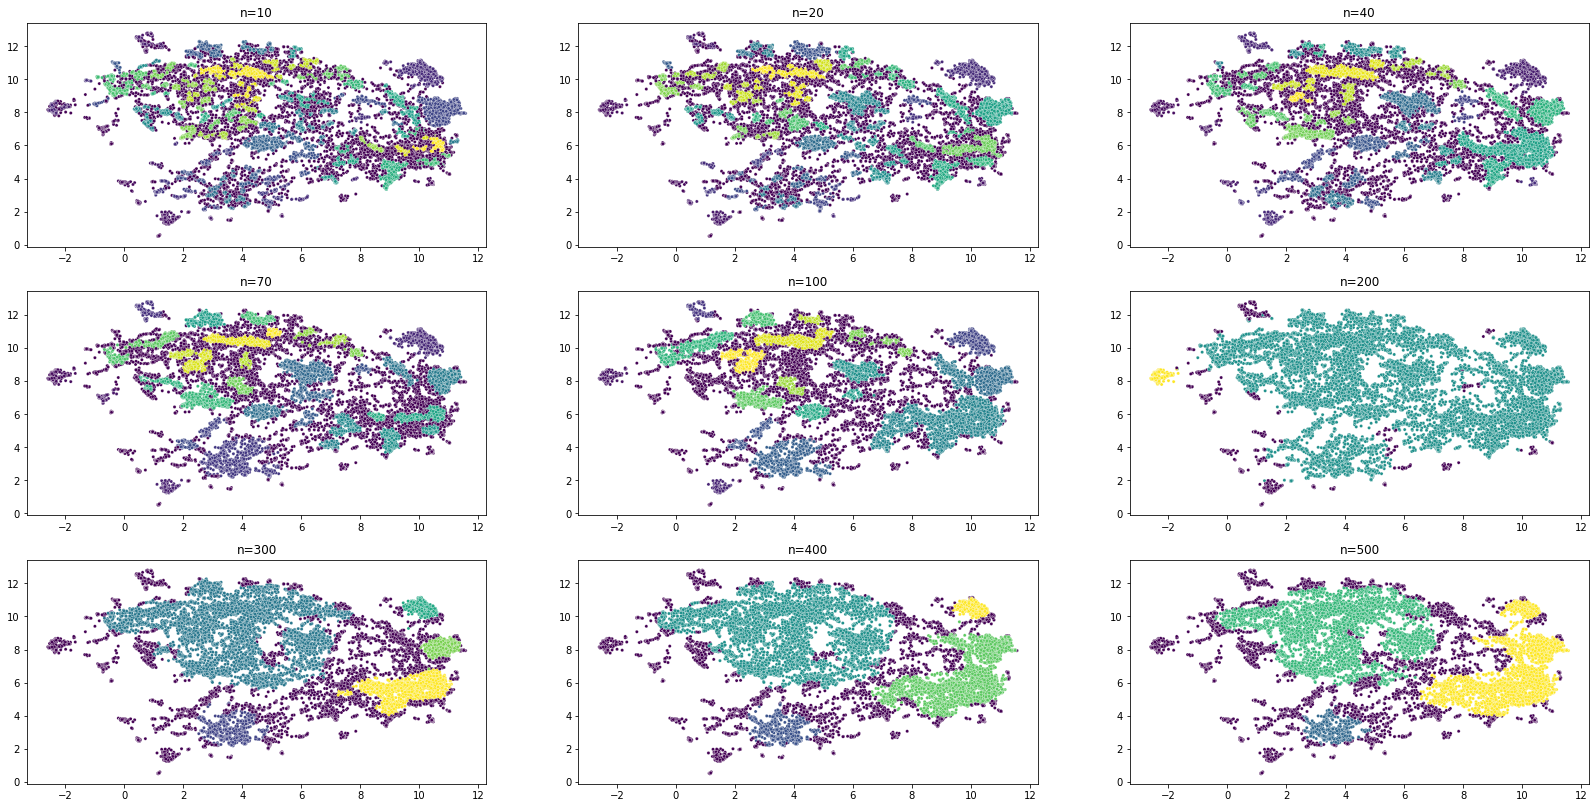

In [36]:
fig, ax = plt.subplots(3, 3, figsize=(28, 14))
nns = [10,20,40,70,100,200,300,400,500]
i, j = 0, 0
for min_cluster_size in tqdm(nns):

    clusters = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size,metric='euclidean').fit(umap_embeddings)
    print(min_cluster_size,'NUMBER OF CLUSTERS:', len(set(clusters.labels_)))
    print(min_cluster_size,'NUMBER OF outliers:', len(np.where((clusters.labels_)==-1)[0]) )

    sns.scatterplot(x=umap_embeddings[:,0], y=umap_embeddings[:,1], ax=ax[j, i],c= clusters.labels_,s=10,)
    # plt.scatter(umap_embeddings[:,0],umap_embeddings[:,1], c= clusters.labels_,s=10,)
    ax[j, i].set_title(f'n={min_cluster_size}')
    if i < 2: i += 1
    else: i = 0; j += 1

  0%|          | 0/8 [00:00<?, ?it/s]

5 NUMBER OF CLUSTERS: 541
5 NUMBER OF outliers: 5051
10 NUMBER OF CLUSTERS: 265
10 NUMBER OF outliers: 4636
15 NUMBER OF CLUSTERS: 193
15 NUMBER OF outliers: 4757
20 NUMBER OF CLUSTERS: 136
20 NUMBER OF outliers: 4976
30 NUMBER OF CLUSTERS: 115
30 NUMBER OF outliers: 5924
50 NUMBER OF CLUSTERS: 65
50 NUMBER OF outliers: 5605
60 NUMBER OF CLUSTERS: 54
60 NUMBER OF outliers: 5783
100 NUMBER OF CLUSTERS: 30
100 NUMBER OF outliers: 5810


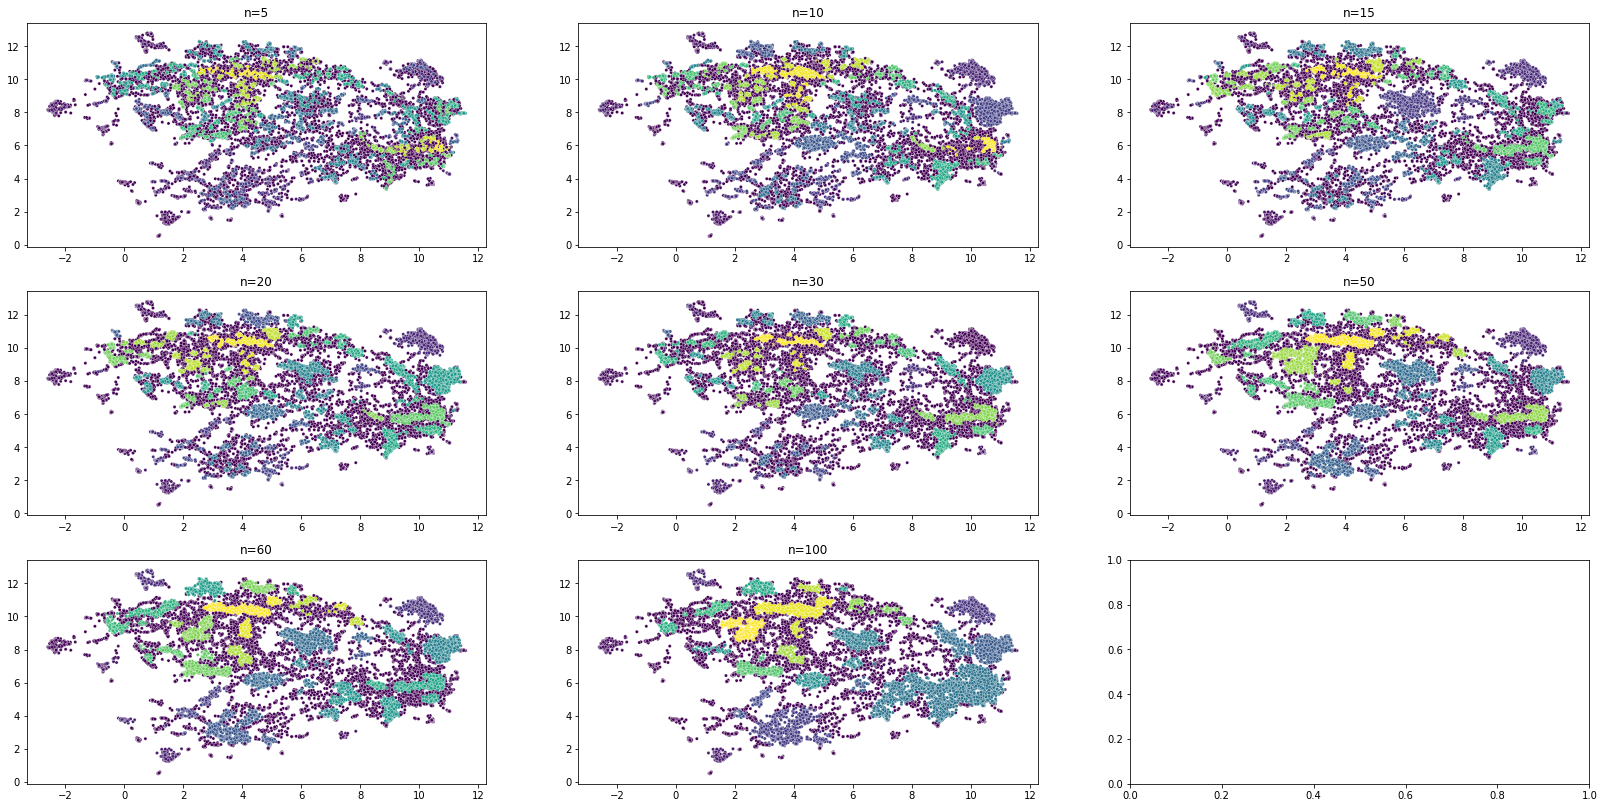

In [37]:
fig, ax = plt.subplots(3, 3, figsize=(28, 14))
# nns = [10,20,40,70,100,200,300,400,500]
nns = [5,10,15,20,30,50,60,100]
i, j = 0, 0
for min_samples in tqdm(nns):

    clusters = hdbscan.HDBSCAN(min_samples = min_samples,metric='euclidean').fit(umap_embeddings)
    print(min_samples,'NUMBER OF CLUSTERS:', len(set(clusters.labels_)))
    print(min_samples,'NUMBER OF outliers:', len(np.where((clusters.labels_)==-1)[0]) )

    sns.scatterplot(x=umap_embeddings[:,0], y=umap_embeddings[:,1], ax=ax[j, i],c= clusters.labels_,s=10,)
    # plt.scatter(umap_embeddings[:,0],umap_embeddings[:,1], c= clusters.labels_,s=10,)
    ax[j, i].set_title(f'n={min_samples}')
    if i < 2: i += 1
    else: i = 0; j += 1